In [1]:
import os
import sys

def add_path():
    path = os.path.abspath(os.path.join(os.getcwd(), "../"))
    if path not in sys.path:
        sys.path.append(path)
    
    path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
    if path not in sys.path:
        sys.path.append(path)

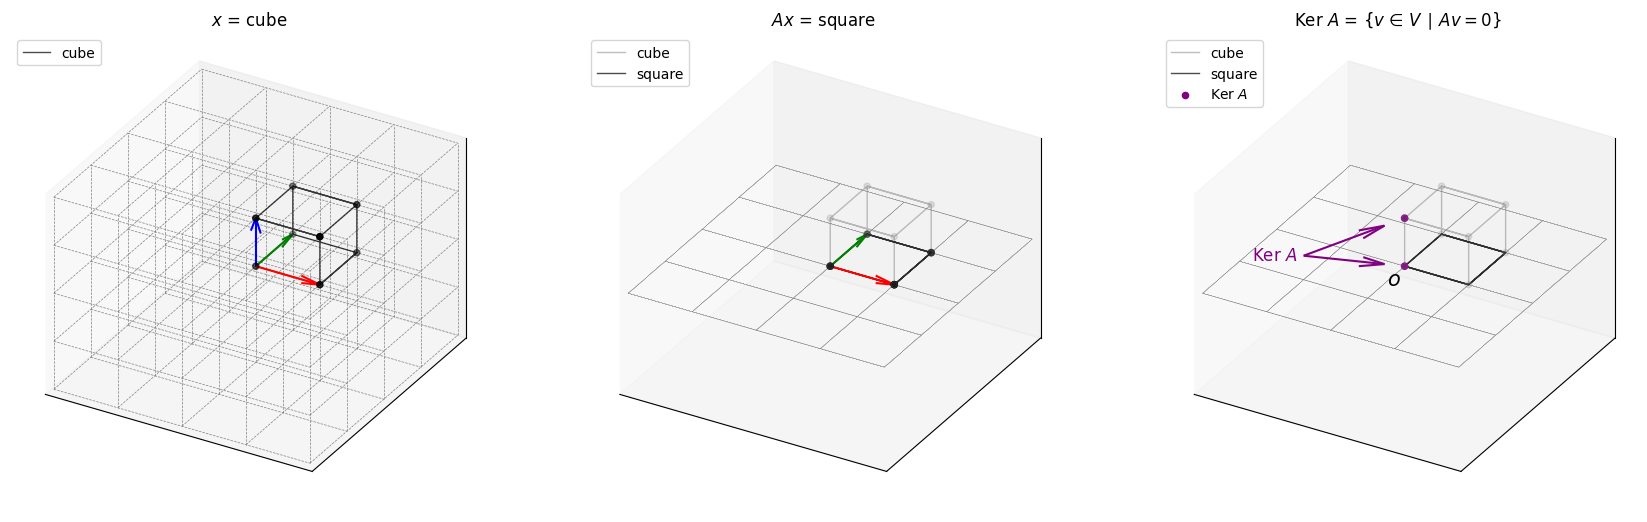

In [110]:
add_path()
import matplotlib.pyplot as plt
import numpy as np
from intuitive_understanding_of_linear_algebra.src import utils

xlim = (-2, 2)
ylim = (-2, 2)
zlim = (-2, 2)

basis = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
)

matrix_a = basis.copy()[:2, :]

cube = utils.cube()
cube = (basis @ cube.T).T
cube_vertices = utils.cube(return_vertices=True)

fig = plt.figure(figsize=(21, 7))
ax1 = fig.add_subplot(131, projection="3d")
ax1.set_proj_type("ortho")
ax1.set_title("$x$ = cube")

utils.plot_full_custom_3d_grid(ax1, basis.T, xlim, ylim, zlim)

ax1.quiver(0, 0, 0, basis[0][0], basis[1][0], basis[2][0], color="r")
ax1.quiver(0, 0, 0, basis[0][1], basis[1][1], basis[2][1], color="g")
ax1.quiver(0, 0, 0, basis[0][2], basis[1][2], basis[2][2], color="b")
ax1.plot(cube[:, 0], cube[:, 1], cube[:, 2], color="black", label="cube", alpha=0.7, linewidth=1)
ax1.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], color="black")
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_aspect("auto")
ax1.legend(loc="upper left")

cube_vertices_transformed = (matrix_a @ cube_vertices.T).T

ax2 = fig.add_subplot(132, projection="3d")
ax2.set_proj_type("ortho")
ax2.set_title("$Ax$ = square")
ax2.plot(cube[:, 0], cube[:, 1], cube[:, 2], color="gray", label="cube", alpha=0.5, linewidth=1)

utils.plot_full_custom_3d_grid(ax2, np.vstack([matrix_a, np.zeros(3)]).T, xlim, ylim, zlim, linewidth=0.2)

ax2.quiver(0, 0, 0, basis[0][0], basis[1][0], basis[2][0], color="r")
ax2.quiver(0, 0, 0, basis[0][1], basis[1][1], basis[2][1], color="g")

cube_transformed = (matrix_a @ cube.T).T
ax2.plot(cube_transformed[:, 0], cube_transformed[:, 1], color="black", label="square", alpha=0.7, linewidth=1)
ax2.scatter(cube_vertices_transformed[:, 0], cube_vertices_transformed[:, 1], color="black")
ax2.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], color="gray", alpha=0.2)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim(zlim)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_aspect("auto")
ax2.legend(loc="upper left")

ker_a = cube_vertices[np.where(np.all(cube_vertices_transformed == np.zeros(2), axis=1))]

ax3 = fig.add_subplot(133, projection="3d")
ax3.set_proj_type("ortho")
ax3.set_title("Ker $A$ = {$v$ ∈ $V$ ∣ $Av = 0$}")
ax3.plot(cube[:, 0], cube[:, 1], cube[:, 2], color="gray", label="cube", alpha=0.5, linewidth=1)

utils.plot_full_custom_3d_grid(ax3, np.vstack([matrix_a, np.zeros(3)]).T, xlim, ylim, zlim, linewidth=0.2)

quiver_origin = np.array([-1, -1, 0.5])
quiver_ker_a = (ker_a - quiver_origin) * 0.8

ax3.quiver(quiver_origin[0], quiver_origin[1], quiver_origin[2] , quiver_ker_a[0][0], quiver_ker_a[0][1], quiver_ker_a[0][2], color="purple")
ax3.quiver(quiver_origin[0], quiver_origin[1], quiver_origin[2] , quiver_ker_a[1][0], quiver_ker_a[1][1], quiver_ker_a[1][2], color="purple")
ax3.text(0, -0.1, 0, "$o $", color="black", fontsize=15, ha="right", va="top")  # Add text at the quiver start point
ax3.text(quiver_origin[0], quiver_origin[1], quiver_origin[2], "Ker $A$  ", color="purple", fontsize=12, ha="right", va="center")  # Add text at the quiver start point

ax3.plot(cube[:, 0], cube[:, 1], color="black", label="square", alpha=0.7, linewidth=1)
ax3.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], color="gray", alpha=0.2)
ax3.scatter(ker_a[:, 0], ker_a[:, 1], ker_a[:, 2], color="purple", alpha=1, label="Ker $A$")
ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_zlim(zlim)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])
ax3.set_aspect("auto")
ax3.legend(loc="upper left")

plt.show()
